# outline

goal: In this notebook I will try to find R2R3 MYBs from the VI subfamily as described in R&J in the Azolla annotation and genome (if the former is unsuccessfull).

I have two resources to search with, the Salivina sequences termed VI by R&J, and the whole VI subfamily I extracted earlier via the R&J paper.

Alternativelly, I may use the pfam or superfamily hmm models to find these genes, but that won't be as specific as I would like it to be.

My resource to search in, is the Azolla filiculoides genome 1.2 and annotation v1.1 from fernbase.org

# Plan 1
First, I'll make an HMM of all VI sequences I have, and hmmsearch the azolla annotation.

In [1]:
mkdir data/genome

In [18]:
wget -O ./data/genome/Azolla_filiculoides.protein.highconfidence_v1.1.fasta \
         ftp://ftp.fernbase.org/Azolla_filiculoides/Azolla_asm_v1.1/Azolla_filiculoides.protein.highconfidence_v1.1.fasta

--2020-07-31 14:21:41--  ftp://ftp.fernbase.org/Azolla_filiculoides/Azolla_asm_v1.1/Azolla_filiculoides.protein.highconfidence_v1.1.fasta
           => ‘./data/genome/Azolla_filiculoides.protein.highconfidence_v1.1.fasta’
Resolving ftp.fernbase.org (ftp.fernbase.org)... 132.236.81.244
Connecting to ftp.fernbase.org (ftp.fernbase.org)|132.236.81.244|:21... connected.
Logging in as anonymous ... Logged in!
==> SYST ... done.    ==> PWD ... done.
==> TYPE I ... done.  ==> CWD (1) /Azolla_filiculoides/Azolla_asm_v1.1 ... done.
==> SIZE Azolla_filiculoides.protein.highconfidence_v1.1.fasta ... 9519909
==> PASV ... done.    ==> RETR Azolla_filiculoides.protein.highconfidence_v1.1.fasta ... done.
Length: 9519909 (9,1M) (unauthoritative)

Azolla_filiculoides 100%[===================>]   9,08M  9,42MB/s    in 1,0s    

2020-07-31 14:21:44 (9,42 MB/s) - ‘./data/genome/Azolla_filiculoides.protein.highconfidence_v1.1.fasta’ saved [9519909]



In [3]:
tree data/genome

data/genome
└── Azolla_filiculoides.protein.highconfidence_v1.1.fasta

0 directories, 1 file


In [4]:
head data/VI_sequences_linear.fasta

>g8575.t1 length:1504 (mRNA) (CHBRA15g00250)  (myb-related protein 305-like)
MDSGGGAVVDADDSALPAQHQGQSHPQAHGQKVAAQQQSVGGGKGGGAGPAVCKSESDAAAAVGGAHGSSPLSLAGDEASAAAAGGKGVSGGAPAVGPKRPLKRGVWLPEEDEILKGYVANQGPKNWSSIETMGLLARSGKSCRLRWMNHLRPDLNRRSTKFTPEEEAIVVTKQKLHGNKWAQIAKSLSGRTDNDVKNFWNMRMKKLAKLARLEKQRQRQLLISQGSPIAMAAAAMGLPPGARMLASPGDVVVSFNPRTIAEAAAQQRLMVSSSAVPAHHHRLQNFCNASAGLAGNGGLTGMGTAGASIHALACGNGGGGAGSGSLGDIFASPSPKGYVHGSAMGDLLHVDPDCIMSTSSILNHHHHHPHHLSPHHHHIHHSLHGLSPTNGTCGTNGGTAGVSPTSAAAAAAAAAAAAALMSGCGDGRSGALSAALQASGKAIGGSGGVGDCSIANHHDPCGRLMTVGGALEHHHQHHHHHHQNQLLMQARGCGLLLHSGGGLHAVLNRWGDLKGQSLGGVGGRGSSDGDSVVPISAGGSPSFMQACGLATTPSAQCLMTPCTRPGSVLTGVGRTSPTCMPVHLSEMLKVHNSPVSLVCDMTTGKPTMDGLTKALGFAEPQSADVGDSGIGSGGVCLDGGVTTDCSTDPNMSSSCNSTESSGTHQPQYMMTGGSTGMAASGVPSCAAPLNGQGAMAPSVARAAAVTCLDGDVESPTVFRNNNMPRSTSAGTATVPAGAINLDVERNLVSNSNAFSTADRALEAVTNGKAAMSGGGNGSGASSSSPSHRHQQQQSVGCTASSKDLLDNLGIGVEGAVRSAVNGANIAAAIGQSLMPLDVCFGRAGVDVDAGLATMSESQATTMSAPPRMSPRMSSSNVTLRGQTTPVLNRSPSFTFSADMAATTPRSSSIAAGGTGTTLMVGGE

In [6]:
hmmbuild -h

# hmmbuild :: profile HMM construction from multiple sequence alignments
# HMMER 3.3 (Nov 2019); http://hmmer.org/
# Copyright (C) 2019 Howard Hughes Medical Institute.
# Freely distributed under the BSD open source license.
# - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - -
Usage: hmmbuild [-options] <hmmfile_out> <msafile>

Basic options:
  -h     : show brief help on version and usage
  -n <s> : name the HMM <s>
  -o <f> : direct summary output to file <f>, not stdout
  -O <f> : resave annotated, possibly modified MSA to file <f>

Options for selecting alphabet rather than guessing it:
  --amino : input alignment is protein sequence data
  --dna   : input alignment is DNA sequence data
  --rna   : input alignment is RNA sequence data

Alternative model construction strategies:
  --fast           : assign cols w/ >= symfrac residues as consensus  [default]
  --hand           : manual construction (requires reference annotation)
  --symfrac <x>    : sets sym fra

In [8]:
hmmbuild --cpu $(nproc) ./data/VI-sequences_linear_hmm-v1.hmm ./data/alignments_raw/VI_sequences_linear_aligned-mafft-linsi.fasta

# hmmbuild :: profile HMM construction from multiple sequence alignments
# HMMER 3.3 (Nov 2019); http://hmmer.org/
# Copyright (C) 2019 Howard Hughes Medical Institute.
# Freely distributed under the BSD open source license.
# - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - -
# input alignment file:             ./data/alignments_raw/VI_sequences_linear_aligned-mafft-linsi.fasta
# output HMM file:                  ./data/VI-sequences_linear_hmm-v1.hmm
# number of worker threads:         4
# - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - -

# idx name                  nseq  alen  mlen eff_nseq re/pos description
#---- -------------------- ----- ----- ----- -------- ------ -----------
1     VI_sequences_linear_aligned-mafft-linsi    11  1791   414     1.55  0.590 

# CPU time: 0.26u 0.00s 00:00:00.26 Elapsed: 00:00:00.26


In [15]:
hmmpress data/VI-sequences_linear_hmm-v1.hmm

Working...    done.
Pressed and indexed 1 HMMs (1 names).
Models pressed into binary file:   data/VI-sequences_linear_hmm-v1.hmm.h3m
SSI index for binary model file:   data/VI-sequences_linear_hmm-v1.hmm.h3i
Profiles (MSV part) pressed into:  data/VI-sequences_linear_hmm-v1.hmm.h3f
Profiles (remainder) pressed into: data/VI-sequences_linear_hmm-v1.hmm.h3p


In [1]:
hmmscan --cpu $(nproc) \
        --tblout ./data/VI-sequences_linear_hmm-v1_Azfihits.tab \
        -o ./data/VI-sequences_linear_hmm-v1_Azfihits.log \
        ./data/VI-sequences_linear_hmm-v1.hmm \
        ./data/genome/Azolla_filiculoides.protein.highconfidence_v1.1.fasta

In [6]:
#excuse this ugly visualisation, I don't have the patience
grep -v '#'  data/VI-sequences_linear_hmm-v1_Azfihits.tab | cut -c 52-70,80-100 | sort -k3nr

Azfi_s0076.g037908         9e-95  304.9 
Azfi_s0021.g015882       4.5e-51  161.0 
Azfi_s0041.g026722       4.3e-50  157.8 
Azfi_s0004.g008455       1.9e-49  155.6 
Azfi_s0035.g025508       4.2e-48  151.2 
Azfi_s0010.g012145       1.7e-47  149.2 
Azfi_s0008.g011612       6.6e-47  147.3 
Azfi_s0129.g048859       8.1e-47  147.0 
Azfi_s0005.g009119         5e-46  144.4 
Azfi_s0005.g009154       5.5e-46  144.2 
Azfi_s0812.g087843       9.4e-46  143.5 
Azfi_s0061.g034930       3.6e-45  141.6 
Azfi_s0445.g070637       5.6e-45  140.9 
Azfi_s0001.g000839       1.9e-44  139.2 
Azfi_s0006.g009830       5.4e-44  137.7 
Azfi_s0014.g013584         1e-42  133.5 
Azfi_s0003.g007581       4.1e-42  131.5 
Azfi_s0010.g012085       4.9e-42  131.2 
Azfi_s0003.g007699       6.2e-42  130.9 
Azfi_s0390.g067689       9.9e-42  130.2 
Azfi_s0016.g014344       1.8e-41  129.4 
Azfi_s0113.g045874       3.4e-41  128.5 
Azfi_s0007.g010866       4.8e-41  128.0 
Azfi_s0217.g058506       4.8e-41  128.0 
Azfi_s0938.g0931

### intermediate conclusion
That's quite some results and even some quite good hits if you ask me.
Before I proceed to extract these sequences, inspect the alignment with VI and VII subfamilies and make a phylogeny,
I first want to do a quick blast with the salvinia sequences (nucleotide) against the Azolla filiculoides genome.


# Plan 2
blast salvinia type VI sequences against Azolla filiculoides CDSs/genome.

In [9]:
conda activate blast
makeblastdb -h
conda deactivate

(blast) USAGE
  makeblastdb [-h] [-help] [-in input_file] [-input_type type]
    -dbtype molecule_type [-title database_title] [-parse_seqids]
    [-hash_index] [-mask_data mask_data_files] [-mask_id mask_algo_ids]
    [-mask_desc mask_algo_descriptions] [-gi_mask]
    [-gi_mask_name gi_based_mask_names] [-out database_name]
    [-max_file_sz number_of_bytes] [-logfile File_Name] [-taxid TaxID]
    [-taxid_map TaxIDMapFile] [-version]

DESCRIPTION
   Application to create BLAST databases, version 2.5.0+

Use '-help' to print detailed descriptions of command line arguments
(blast) (base) 

: 1

In [11]:
conda activate blast
makeblastdb -in ./data/genome/Azolla_filiculoides.protein.highconfidence_v1.1.fasta \
            -out data/genome/Azolla_filiculoides.protein.highconfidence_v1.1_blastdb \
            -title Azolla_filiculoides.protein.highconfidence_v1.1 \
            -logfile data/genome/Azolla_filiculoides.protein.highconfidence_v1.1_blastdb.log \
            -dbtype prot
conda deactivate




(blast) (blast) (base) 

: 1

In [12]:
tree data/genome

data/genome
├── Azolla_filiculoides.protein.highconfidence_v1.1_blastdb.log
├── Azolla_filiculoides.protein.highconfidence_v1.1_blastdb.perf
├── Azolla_filiculoides.protein.highconfidence_v1.1_blastdb.phr
├── Azolla_filiculoides.protein.highconfidence_v1.1_blastdb.pin
├── Azolla_filiculoides.protein.highconfidence_v1.1_blastdb.psq
└── Azolla_filiculoides.protein.highconfidence_v1.1.fasta

0 directories, 6 files
(base) 

: 1

In [13]:
conda activate blast
blastp -h
conda deactivate

(blast) USAGE
  blastp [-h] [-help] [-import_search_strategy filename]
    [-export_search_strategy filename] [-task task_name] [-db database_name]
    [-dbsize num_letters] [-gilist filename] [-seqidlist filename]
    [-negative_gilist filename] [-entrez_query entrez_query]
    [-db_soft_mask filtering_algorithm] [-db_hard_mask filtering_algorithm]
    [-subject subject_input_file] [-subject_loc range] [-query input_file]
    [-out output_file] [-evalue evalue] [-word_size int_value]
    [-gapopen open_penalty] [-gapextend extend_penalty]
    [-qcov_hsp_perc float_value] [-max_hsps int_value]
    [-xdrop_ungap float_value] [-xdrop_gap float_value]
    [-xdrop_gap_final float_value] [-searchsp int_value]
    [-sum_stats bool_value] [-seg SEG_options] [-soft_masking soft_masking]
    [-matrix matrix_name] [-threshold float_value] [-culling_limit int_value]
    [-best_hit_overhang float_value] [-best_hit_score_edge float_value]
    [-window_size int_value] [-lcase_masking] [-query_loc ra

: 1

In [34]:
conda activate blast
blastp -db ./data/genome/Azolla_filiculoides.protein.highconfidence_v1.1_blastdb \
       -query <(grep Sacu -A1 ./data/VI_sequences_linear.fasta) \
       -num_threads $(nproc) \
       -outfmt 6 \
       -out ./data/VI-sequences_linear_blasthits-v1.tab
conda deactivate

(blast) (blast) (base) 

: 1

In [38]:
cut -f 2-4,11- data/VI-sequences_linear_blasthits-v1.tab | head -n 20

Azfi_s0076.g037908	78.378	185	1.54e-94	271
Azfi_s0004.g008455	42.958	142	3.03e-35	129
Azfi_s0021.g015882	43.704	135	3.26e-34	126
Azfi_s0014.g013584	47.619	126	2.20e-32	120
Azfi_s0129.g048859	46.774	124	1.50e-31	118
Azfi_s0035.g025508	41.216	148	1.78e-31	114
Azfi_s0005.g009154	42.568	148	4.68e-31	117
Azfi_s0041.g026722	45.902	122	7.06e-31	115
Azfi_s0008.g011612	43.548	124	1.36e-30	114
Azfi_s0010.g012145	44.628	121	3.50e-30	114
Azfi_s0005.g009119	46.721	122	1.09e-29	113
Azfi_s0001.g000839	40.157	127	1.58e-29	108
Azfi_s0016.g014344	38.776	147	9.18e-29	110
Azfi_s0006.g009830	42.149	121	1.24e-28	107
Azfi_s0003.g007581	47.500	120	3.25e-28	105
Azfi_s0445.g070637	44.715	123	4.48e-28	107
Azfi_s0938.g093183	42.308	130	6.23e-28	108
Azfi_s0010.g012085	39.259	135	9.76e-28	107
Azfi_s0163.g054240	38.849	139	3.03e-27	105
Azfi_s0113.g045874	38.519	135	4.67e-27	105
(base) 

: 1

Some good blast hit's as well, let's put these next to the first 20 hmmscan hits I found before.

In [40]:
#excuse this ugly visualisation, I don't have the patience
grep -v '#'  data/VI-sequences_linear_hmm-v1_Azfihits.tab | cut -c 52-70,80-100 | sort -k3nr | head -n 20

(base) Azfi_s0076.g037908         9e-95  304.9 
Azfi_s0021.g015882       4.5e-51  161.0 
Azfi_s0041.g026722       4.3e-50  157.8 
Azfi_s0004.g008455       1.9e-49  155.6 
Azfi_s0035.g025508       4.2e-48  151.2 
Azfi_s0010.g012145       1.7e-47  149.2 
Azfi_s0008.g011612       6.6e-47  147.3 
Azfi_s0129.g048859       8.1e-47  147.0 
Azfi_s0005.g009119         5e-46  144.4 
Azfi_s0005.g009154       5.5e-46  144.2 
Azfi_s0812.g087843       9.4e-46  143.5 
Azfi_s0061.g034930       3.6e-45  141.6 
Azfi_s0445.g070637       5.6e-45  140.9 
Azfi_s0001.g000839       1.9e-44  139.2 
Azfi_s0006.g009830       5.4e-44  137.7 
Azfi_s0014.g013584         1e-42  133.5 
Azfi_s0003.g007581       4.1e-42  131.5 
Azfi_s0010.g012085       4.9e-42  131.2 
Azfi_s0003.g007699       6.2e-42  130.9 
Azfi_s0390.g067689       9.9e-42  130.2 
(base) 

: 1

It makes sense these aren't exactly the same, in the hmm I used more sequences while in blast I only used Salvinia sequences.
I was planning to take the top 5 hmm hits to investigate further, but I'll take the top 5 blast hits too.
This mostly overlaps anyway.

In [65]:
sort <(grep -v '#'  data/VI-sequences_linear_hmm-v1_Azfihits.tab | cut -c 52-70,80-100 | sort -k3nr | head -n 5 | cut -c 1-18 ) \
     <(cut -f 2 data/VI-sequences_linear_blasthits-v1.tab | head -n 5) \
     | uniq > data/Azfi-mybs-subfamVI-suspects.list
     


(base) 

: 1

In [77]:
cat data/Azfi-mybs-subfamVI-suspects.list

Azfi_s0004.g008455
Azfi_s0014.g013584
Azfi_s0021.g015882
Azfi_s0035.g025508
Azfi_s0041.g026722
Azfi_s0076.g037908
Azfi_s0129.g048859


In [76]:
grep Azfi ./data/combi_sequences_linear.fasta

>Azfi_s0004.g008455 Myb transcription factor [0.077]
>Azfi_s0021.g015882 Myb transcription factor [0.077]


Not unimportant, the two Azfi type VII sequences I identified in notebook 2 are also in these blast hits. Including our best hit, so it may be al type VII perhaps.

# Extract sequences and compare to VI and VII seqeunces

First, let's linearise the annotation protein fasta.

Then extract the Azfi sequences of interest and put these in a combi fasta with the previously examined VI and VII sequences.

Finally, I'll make an alignment and log a snapshot here.

In [66]:
cat data/genome/Azolla_filiculoides.protein.highconfidence_v1.1.fasta \
     | awk '/^>/ {printf("%s%s\n",(N>0?"\n":""),$0);N++;next;} {printf("%s",$0);} END {printf("\n");}' \
     > data/genome/Azolla_filiculoides.protein.highconfidence_v1.1_linear.fasta

(base) 

: 1

In [67]:
grep -A 1 --no-group-separator \
     -f ./data/Azfi-mybs-subfamVI-suspects.list \
     ./data/genome/Azolla_filiculoides.protein.highconfidence_v1.1_linear.fasta \
     > ./data/Azfi-mybs-subfamVI-suspects.fasta

(base) 

: 1

In [68]:
cat data/VI_sequences_linear.fasta \
    data/Azfi-mybs-subfamVI-suspects.fasta \
    data/VII_sequences_linear.fasta \
    > data/combi-VI-VII-Azfisuspects.fasta

(base) 

: 1

In [1]:
inseq=combi-VI-VII-Azfisuspects

In [71]:
conda activate phylogenetics
linsi --thread $(nproc) data/$inseq.fasta > ./data/alignments_raw/"$inseq"_aligned-mafft-linsi.fasta \
                                                      2> ./data/alignments_raw/"$inseq"_aligned-mafft-linsi.log
conda deactivate

(phylogenetics) (phylogenetics) 

In [73]:
cat ./data/alignments_raw/"$inseq"_aligned-mafft-linsi.log

outputhat23=16
treein = 0
compacttree = 0
stacksize: 8192 kb
All-to-all alignment.
tbfast-pair (aa) Version 7.407
alg=L, model=BLOSUM62, 2.00, -0.10, +0.10, noshift, amax=0.0
4 thread(s)

outputhat23=16
Loading 'hat3.seed' ... 
done.
Writing hat3 for iterative refinement
Gap Penalty = -1.53, +0.00, +0.00
tbutree = 1, compacttree = 0
Constructing a UPGMA tree ... 
   20 / 29
done.

Progressive alignment ... 
STEP    28 /28 (thread    3) 
done.
tbfast (aa) Version 7.407
alg=A, model=BLOSUM62, 1.53, -0.00, -0.00, noshift, amax=0.0
4 thread(s)

minimumweight = 0.000010
autosubalignment = 0.000000
nthread = 4
randomseed = 0
blosum 62 / kimura 200
poffset = 0
niter = 16
sueff_global = 0.100000
nadd = 16
Loading 'hat3' ... done.

   20 / 29
Segment   1/  1    1-2133
006-0054-1 (thread    3) worse         
Converged.
done
dvtditr (aa) Version 7.407
alg=A, model=BLOSUM62, 1.53, -0.00, -0.00, noshift, amax=0.0
4 thread(s)


Strategy:
 L-INS-i (Probably most accurate, very slow)
 Iterative refine

In [74]:
conda activate jalview
for   i in data/alignments_raw/*aligned*.fasta
do    prefix=$(echo $i | sed 's/\.fasta//')
      if   [ ! -f $prefix.png ]
      then jalview -nodisplay \
              -open $prefix.fasta \
              -colour CLUSTAL \
              -png  $prefix.png > /dev/null 2> /dev/null
      fi
done
conda deactivate

(jalview) (jalview) 

of course the full aligment is super long:
![alignment](./data/alignments_raw/combi-VI-VII-Azfisuspects_aligned-mafft-linsi.png)


### intermediate conclusions
While most Azfi sequences look like VII sequences (just as the two RNA seq targets identified before),
it does seem I found a type VI one: Azfi_s0076.g037908

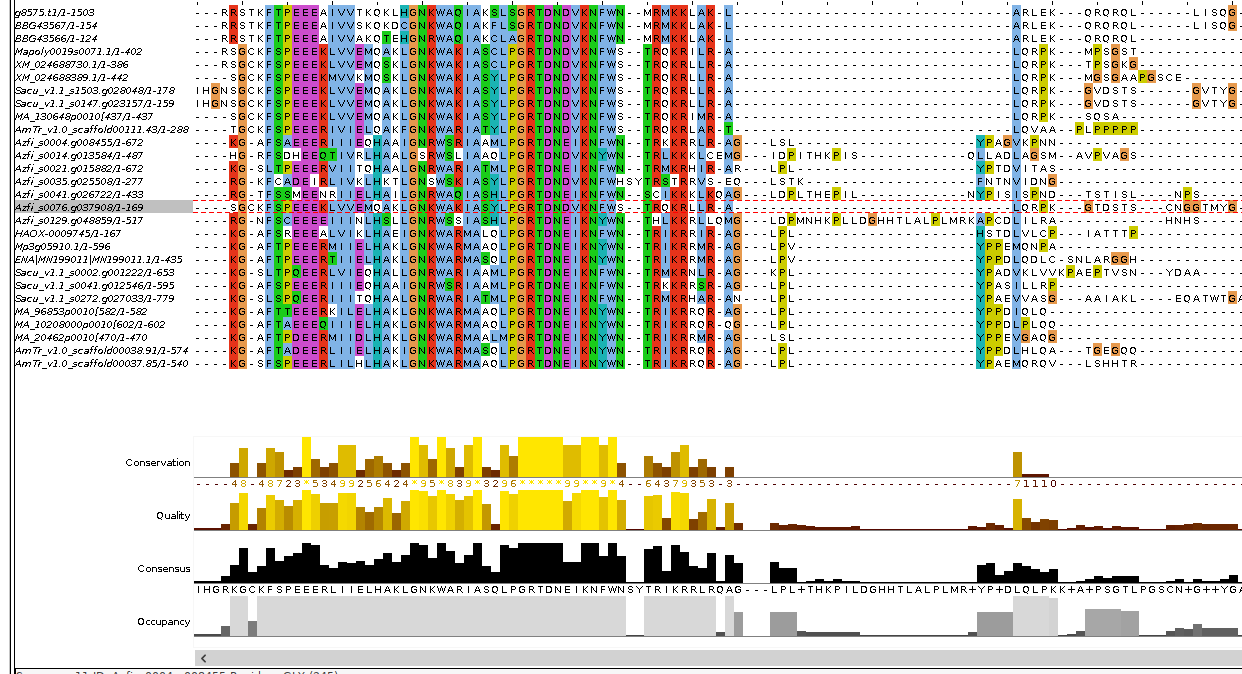

## Trimming and phylogeny 

To back up my observation of this Type VI myb in Azfi, let's make a quick phylogenetic tree of this alignment after trimming much like in step 2.

I may add more submafilies to this tree inference later.

In [2]:
conda activate phylogenetics
if    [ ! -d data/alignments_trimmed ]
then  mkdir  data/alignments_trimmed 
fi

# define appendix only once here:
trimappendix='trim-gt4'

for a in "data/alignments_raw/$inseq"_aligned*.fasta
do  appendix=$(echo $a | cut -d '/' -f 3- | sed "s/$inseq\_//" | sed "s/.fasta//")
    if    [ ! -f data/alignments_trimmed/"$inseq"_"$appendix"_"$trimappendix".fasta ]
    then  echo "trimming alignment $a"
          sed -i 's/ /_/g' $a
          trimal -in $a   \
                 -out data/alignments_trimmed/"$inseq"_"$appendix"_"$trimappendix".fasta \
                 -gt .4 \
                 -htmlout data/alignments_trimmed/"$inseq"_"$appendix"_"$trimappendix".html
    fi
done
conda deactivate

(phylogenetics) (phylogenetics) (phylogenetics) (phylogenetics) (phylogenetics) (phylogenetics) trimming alignment data/alignments_raw/combi-VI-VII-Azfisuspects_aligned-mafft-linsi.fasta
(phylogenetics) (base) 

: 1

In [4]:
conda activate jalview
for   i in data/alignments_trimmed/*.fasta
do    prefix=$(echo $i | sed 's/\.fasta//')
      if    [ ! -f $prefix.png ]
      then  jalview -nodisplay \
                    -open $prefix.fasta \
                    -colour CLUSTAL \
                    -png  $prefix.png > /dev/null 2> /dev/null
      fi
done
conda deactivate

(jalview) (jalview) (base) 

: 1

In [5]:
tree ./data/alignments_trimmed

./data/alignments_trimmed
├── combi_sequences_linear_aligned-mafft-linsi_trim-gt4.fasta
├── combi_sequences_linear_aligned-mafft-linsi_trim-gt4.png
├── combi_sequences_linear_aligned-mafft-linsi_trim-gt6.fasta
├── combi_sequences_linear_aligned-mafft-linsi_trim-gt6.png
├── combi-VI-VII-Azfisuspects_aligned-mafft-linsi_trim-gt4.fasta
├── combi-VI-VII-Azfisuspects_aligned-mafft-linsi_trim-gt4.html
└── combi-VI-VII-Azfisuspects_aligned-mafft-linsi_trim-gt4.png

0 directories, 7 files
(base) 

: 1

let's have a look at this trimmed alignment:
![trim](data/alignments_trimmed/combi-VI-VII-Azfisuspects_aligned-mafft-linsi_trim-gt4.png)

Still looks quite lenient to me, but that's what I did in step two so I'll keep this for now.

### tree

In [6]:
conda activate phylogenetics
for a in data/alignments_trimmed/"$inseq"_aligned*gt[46].fasta
do  #iqpendix='iqtree-b100'
    iqpendix='iqtree-bb2000-alrt2000'

    echo "making a tree of file $a"
    echo "The first lines of alignment $a look like this"
    head $a

    file_appendix=$(echo $a | cut -d '/' -f 3- | sed "s/$inseq\_//" | sed "s/.fasta//")
    
    if   [ ! -d    analyses/"$inseq"_trees/"$file_appendix" ]
    then echo "Making a directory $file_appendix to store trees (name based on alignment filename)"
         mkdir -p  analyses/"$inseq"_trees/"$file_appendix" 
    fi

    iqprefix=analyses/"$inseq"_trees/"$file_appendix"/"$inseq"_"$file_appendix"_"$iqpendix"
    if   [ ! -f "$iqprefix".tree ]
    then nice iqtree -s $a \
                     -m MFP \
                     -bb 2000 -alrt 2000 \
                     -nt AUTO \
                     -ntmax $(nproc)  \
                     -pre  "$iqprefix" \
                     2>   "$iqprefix".stderr \
                      >    "$iqprefix".stdout
    #cat "$iqprefix".log | mail -s "IQtree_run $a" laura
    fi
done
conda deactivate

(phylogenetics) making a tree of file data/alignments_trimmed/combi-VI-VII-Azfisuspects_aligned-mafft-linsi_trim-gt4.fasta
The first lines of alignment data/alignments_trimmed/combi-VI-VII-Azfisuspects_aligned-mafft-linsi_trim-gt4.fasta look like this
>g8575.t1_length
MDSGGQAHGQKVAAQQQSVGGGKGGGAVGPKRPLKRGVWLPEEDEILKGYVANQGPKNWS
SIETMGLLARSGKSCRLRWMNHLRPDLNRSTKFTPEEEAIVVTKQKLHGNKWAQIAKSLS
GRTDNDVKNFWNMRMKKLAKL--------ARLEKQRQRQLSPIAMAAAAMGLPPGARMLA
SPGDVVVLQNFCSPSPKGYVGSHHHHHPHHLSPLSPTNRSGALSAALQASPCTRPGSVLT
GVGRTTDPNMSSCNSTELNGQGAMAPSVARNASSSSPSHRHQQQQSVEGAVRSAVNGANQ
ATTMSAPLRGVLNRSPSADMAATTSSSGGTGTTLMVGTSRQQRSQADDNAFAMEATAAID
LLLEQQQRQTTMRQFGGLAGMGCAAATEEAEEEDDESGFLSGPPVTLPSHDPRQQQQQHP
DQDTAASDAAYGSTLQMPTTVGGFSGQEQSSLLQTNGMRDATPPLGAAVPPLNDESNRLG
SLSWAQDTVFLDSMLDSC
Making a directory aligned-mafft-linsi_trim-gt4 to store trees (name based on alignment filename)
(phylogenetics) (base) 

: 1

Initial tree supports inspection of alignment, g037908 seems to be a type VI MYB that wasn't picked up before.

It seems g008455 has a salivianels duplication variant g015882.

Then there is four other genes which may be duplication results of two original genes. It could be interesting to put those into a category as well and inspect their expression.

tree: https://itol.embl.de/tree/9421021579392231596463872

![tree image](analyses/combi-VI-VII-Azfisuspects_trees/aligned-mafft-linsi_trim-gt4/combi-VI-VII-Azfisuspects_aligned-mafft-linsi_trim-gt4_iqtree-bb2000-alrt2000.png)